# 📊 Linear Regression with Exploratory Data Analysis

Welcome to this notebook! In this project, we explore the fundamentals of **Linear Regression**, one of the most widely used algorithms in machine learning.  
Our goal is to understand the relationship between variables through visualizations and implement a linear regression model to make predictions.

We start by:
- Loading and exploring the dataset,
- Visualizing key relationships and patterns using Seaborn and Matplotlib,
- Preparing the data for modeling,
- Building and evaluating a simple linear regression model.

Let’s dive into the data!

**About Dataset**
- This dataset contains information about various vehicles' carbon dioxide (CO2) emissions and fuel consumption. 
- In the context of Machine Learning (ML), this dataset is often used to predict CO2 emissions based on vehicle characteristics or to analyze fuel efficiency of vehicles. 
- The goal could be to predict CO2 emissions or fuel consumption based on the features of the vehicles.
- There are total 7385 rows and 12 columns. 

**The columns in the dataset can be described as follows:**

1. **Make**: The brand of the vehicle.
2. **Model**: The model of the vehicle.
3. **Vehicle Class**: The class of the vehicle (e.g., compact, SUV).
4. **Engine Size(L)**: The engine size in liters.
5. **Cylinders**: The number of cylinders in the engine.
6. **Transmission**: The type of transmission (e.g., automatic, manual).
7. **Fuel Type**: The type of fuel used (e.g., gasoline, diesel).
8. **Fuel Consumption City (L/100 km)**: Fuel consumption in the city (liters per 100 kilometers).
9. **Fuel Consumption Hwy (L/100 km)**: Highway (out-of-city) fuel consumption.
10. **Fuel Consumption Comb (L/100 km)**: Combined (city and highway) fuel consumption.
11. **Fuel Consumption Comb (mpg)**: Combined fuel consumption in miles per gallon.
12. **CO2 Emissions(g/km)**: CO2 emissions in grams per kilometer.

**Model**

**The "Model" column includes terms that identify specific features or configurations of vehicles:**
- `4WD/4X4`: Four-wheel drive. A drive system where all four wheels receive power.
- `AWD`: All-wheel drive. Similar to 4WD but often with more complex mechanisms for power distribution.
- `FFV`: Flexible-fuel vehicle. Vehicles that can use multiple types of fuel, such as both gasoline and ethanol blends.
- `SWB`: Short wheelbase.
- `LWB`: Long wheelbase.
- `EWB`: Extended wheelbase.

**Transmission**

**The "Transmission" column indicates the type of transmission system in the vehicle:**
- `A`: Automatic. A transmission type that operates without the need for the driver to manually change gears.
- `AM`: Automated manual. A version of a manual transmission that is automated.
- `AS`: Automatic with select shift. An automatic transmission that allows for manual intervention.
- `AV`: Continuously variable. A transmission that uses continuously varying ratios instead of fixed gear ratios.
- `M`: Manual. A transmission type that requires the driver to manually change gears.
- `3 - 10`: Number of gears in the transmission.

**Fuel Type**

**The "Fuel Type" column specifies the type of fuel used by the vehicle:**
- `X`: Regular gasoline.
- `Z`: Premium gasoline.
- `D`: Diesel.
- `E`: Ethanol (E85).
- `N`: Natural gas.

**Vehicle Class**

**The "Vehicle Class" column categorizes vehicles by size and type:**
- `COMPACT`: Smaller-sized vehicles.
- `SUV - SMALL`: Smaller-sized sports utility vehicles.
- `MID-SIZE`: Medium-sized vehicles.
- `TWO-SEATER`: Vehicles with two seats.
- `MINICOMPACT`: Very small-sized vehicles.
- `SUBCOMPACT`: Smaller than compact-sized vehicles.
- `FULL-SIZE`: Larger-sized vehicles.
- `STATION WAGON - SMALL`: Smaller-sized station wagons.
- `SUV - STANDARD`: Standard-sized sports utility vehicles.
- `VAN - CARGO`: Vans designed for cargo.
- `VAN - PASSENGER`: Vans designed for passenger transportation.
- `PICKUP TRUCK - STANDARD`: Standard-sized pickup trucks.
- `MINIVAN`: Smaller-sized vans.
- `SPECIAL PURPOSE VEHICLE`: Vehicles designed for special purposes.
- `STATION WAGON - MID-SIZE`: Mid-sized station wagons.
- `PICKUP TRUCK - SMALL`: Smaller-sized pickup trucks.

This dataset can be used to understand the fuel efficiency and environmental impact of vehicles. Machine learning models can use these features to predict CO2 emissions or perform analyses comparing the fuel consumption of different vehicles.

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go

%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [7]:
co2 = pd.read_csv('co2.csv')
df = co2.copy()

In [9]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [13]:
df.shape

(7385, 12)

In [15]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [17]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [19]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [21]:
df.isnull().sum()

make                  0
model                 0
vehicle_class         0
engine_size           0
cylinders             0
transmission          0
fuel_type             0
fuel_cons_city        0
fuel_cons_hwy         0
fuel_cons_comb        0
fuel_cons_comb_mpg    0
co2                   0
dtype: int64

In [23]:
df.duplicated().sum()

1103

In [25]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

In [29]:
corr_matrix=df.select_dtypes(["int","float"]).corr()
corr_matrix

engine_size  cylinders  fuel_cons_city  fuel_cons_hwy  \
engine_size            1.000000   0.928843        0.834228       0.766817   
cylinders              0.928843   1.000000        0.801277       0.717647   
fuel_cons_city         0.834228   0.801277        1.000000       0.950811   
fuel_cons_hwy          0.766817   0.717647        0.950811       1.000000   
fuel_cons_comb         0.820146   0.781099        0.994052       0.978607   
fuel_cons_comb_mpg    -0.762955  -0.723731       -0.927640      -0.891892   
co2                    0.854802   0.834687        0.918756       0.883424   

                    fuel_cons_comb  fuel_cons_comb_mpg       co2  
engine_size               0.820146           -0.762955  0.854802  
cylinders                 0.781099           -0.723731  0.834687  
fuel_cons_city            0.994052           -0.927640  0.918756  
fuel_cons_hwy             0.978607           -0.891892  0.883424  
fuel_cons_comb            1.000000           -0.925801  0.916840  
fuel_cons_comb_mpg       -0.925801            1.000000 -0.906783  
co2                       0.916840           -0.906783  1.000000

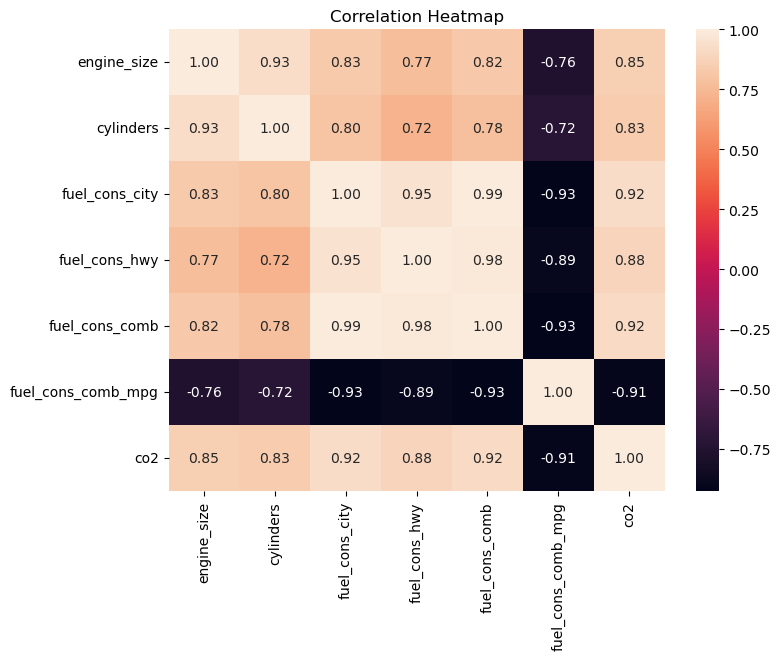

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [33]:
from summarytools import dfSummary
dfSummary(df)

In [35]:
df.make.value_counts().nlargest(20)

make
FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
Name: count, dtype: int64

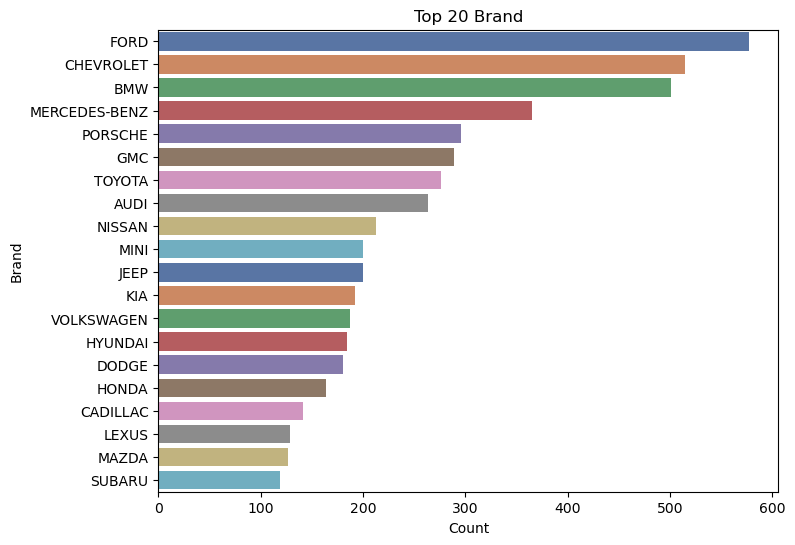

In [37]:
plt.figure(figsize=(8,6))

sns.barplot(x=df.make.value_counts().nlargest(20),y=df.make.value_counts().nlargest(20).index,palette="deep")
plt.title("Top 20 Brand")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

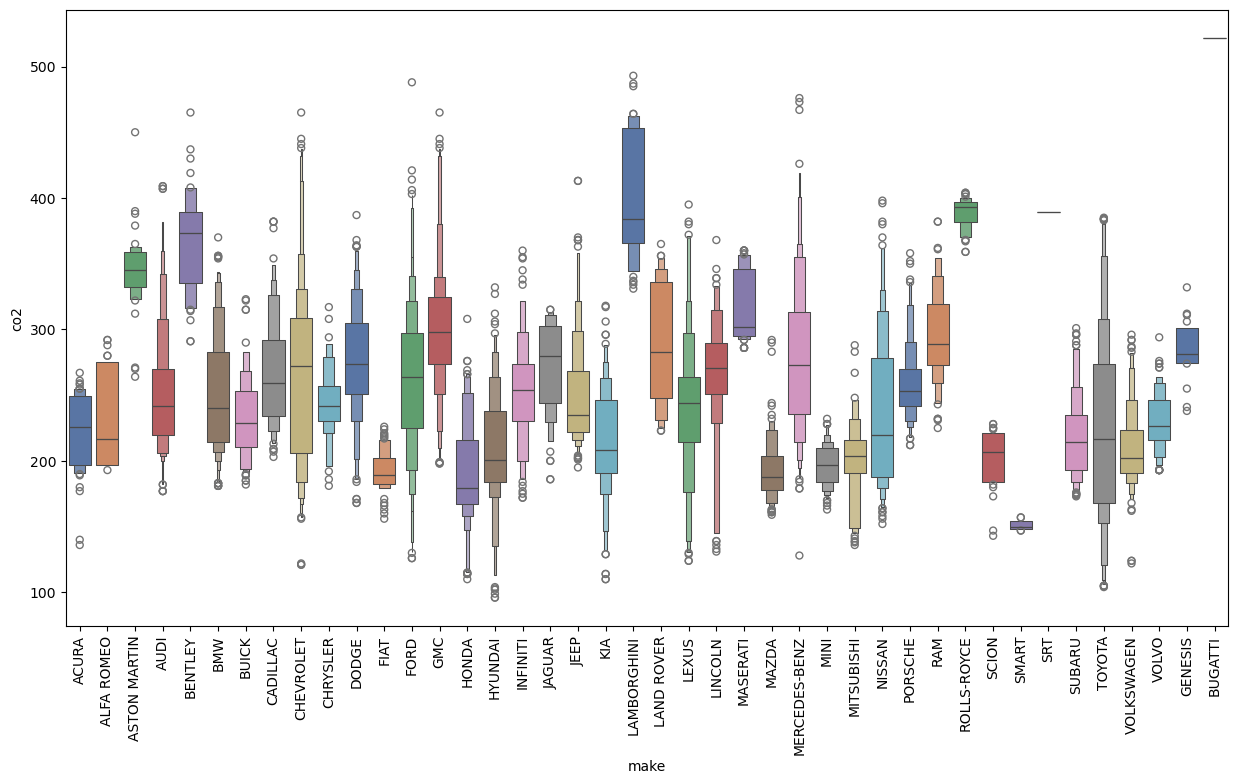

In [39]:
plt.figure(figsize = (15,8))
sns.boxenplot(x="make", y="co2", data=df,palette="deep")
plt.xticks(rotation = 90)
plt.show()

In [41]:
df.model.value_counts().nlargest(20)

model
F-150 FFV        32
F-150 FFV 4X4    31
MUSTANG          27
FOCUS FFV        24
F-150 4X4        20
F-150            19
SONIC 5          18
ATS              18
JETTA            18
COMPASS          18
CAMARO           17
SONIC            17
SIERRA           16
COROLLA          16
ACCORD           16
PATRIOT          16
SILVERADO        16
SILVERADO 4WD    16
TACOMA 4WD       16
SIERRA 4WD       16
Name: count, dtype: int64

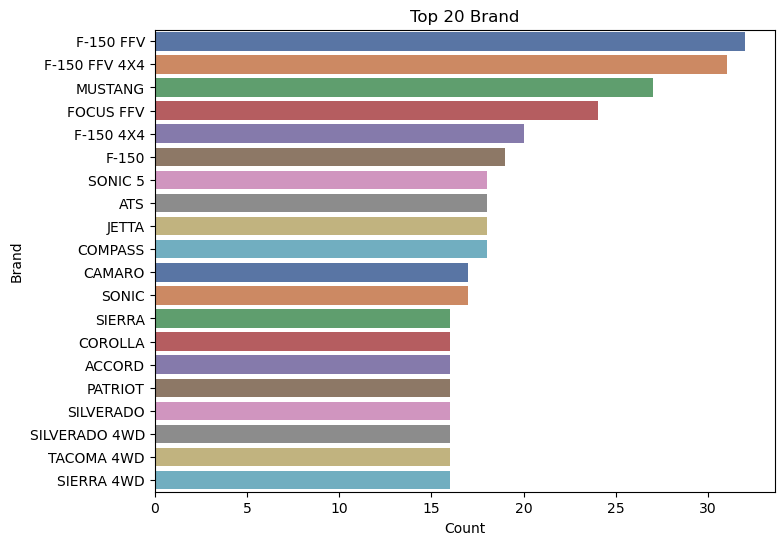

In [43]:
plt.figure(figsize=(8,6))

sns.barplot(x=df.model.value_counts().nlargest(20),y=df.model.value_counts().nlargest(20).index,palette="deep")
plt.title("Top 20 Brand")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

In [45]:
df.vehicle_class.value_counts()

vehicle_class
SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: count, dtype: int64

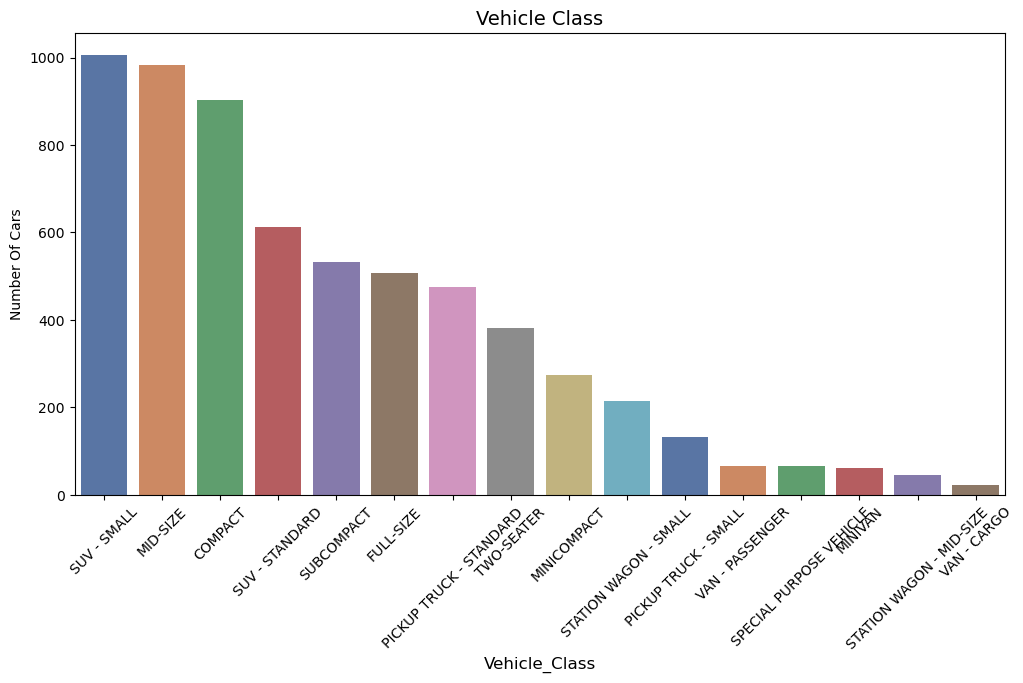

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.vehicle_class.value_counts().index, y=df.vehicle_class.value_counts().values,palette="deep")
plt.title("Vehicle Class", fontsize=14)
plt.xlabel("Vehicle_Class", fontsize=12)
plt.ylabel("Number Of Cars", fontsize=10)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [49]:
df.engine_size.value_counts()

engine_size
2.0    1260
3.0     687
3.6     433
3.5     431
2.5     355
2.4     287
1.6     272
5.3     240
1.8     191
5.0     179
1.5     176
1.4     170
4.0     161
6.2     141
4.4     124
3.8     100
5.7      92
3.7      90
2.7      86
6.0      86
4.7      70
3.3      64
5.5      50
4.3      48
3.4      48
2.3      46
5.2      42
6.4      35
5.6      31
6.6      28
4.8      28
4.6      28
3.2      27
6.7      23
2.8      20
2.9      19
1.2      19
1.0      18
6.5      17
4.2      13
5.4       8
6.8       8
1.3       7
2.1       5
8.4       5
5.9       4
6.3       3
0.9       3
8.0       2
5.8       1
2.2       1
Name: count, dtype: int64

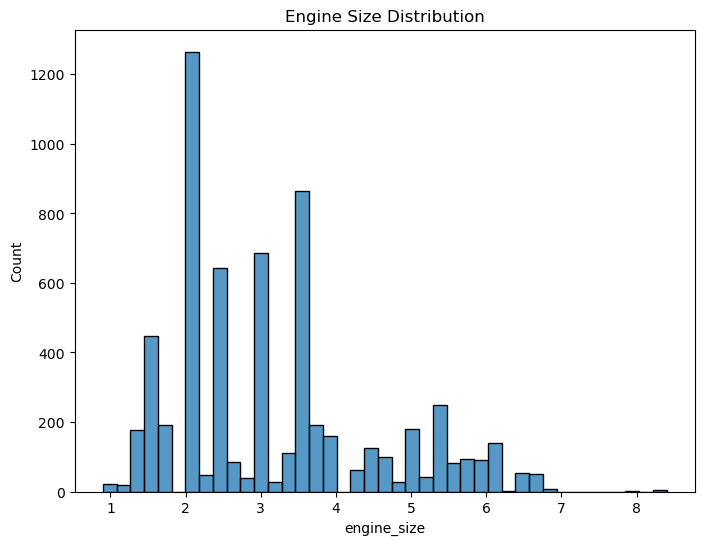

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(df.engine_size)
plt.title("Engine Size Distribution")
plt.show()

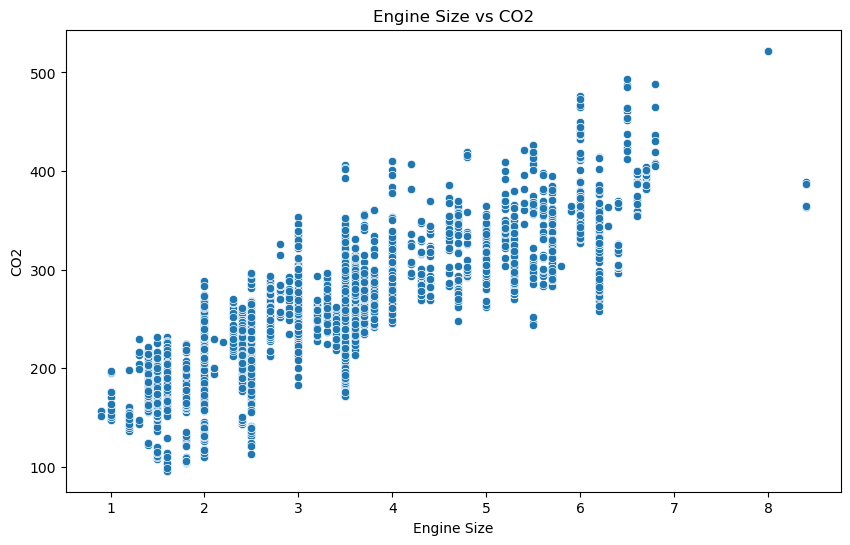

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.engine_size,y=df.co2,palette="deep")
plt.title("Engine Size vs CO2")
plt.xlabel("Engine Size")
plt.ylabel("CO2")
plt.show()

In [55]:
transmission_distr = df['cylinders'].value_counts().reset_index(name='count')
transmission_distr.columns = ['cylinders', 'count']  

fig = px.pie(transmission_distr, values='count', names='cylinders', title="Cylinders Distribution")
fig.show()

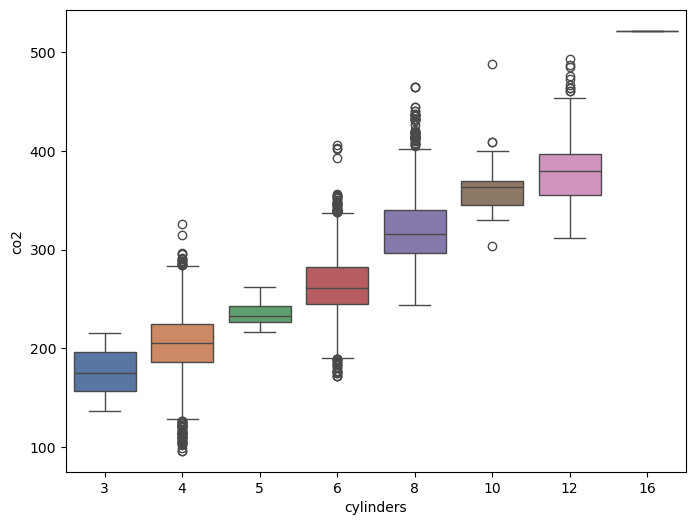

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.cylinders,y=df.co2,palette="deep")
plt.show()

In [57]:
df.transmission.value_counts()

transmission
AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: count, dtype: int64

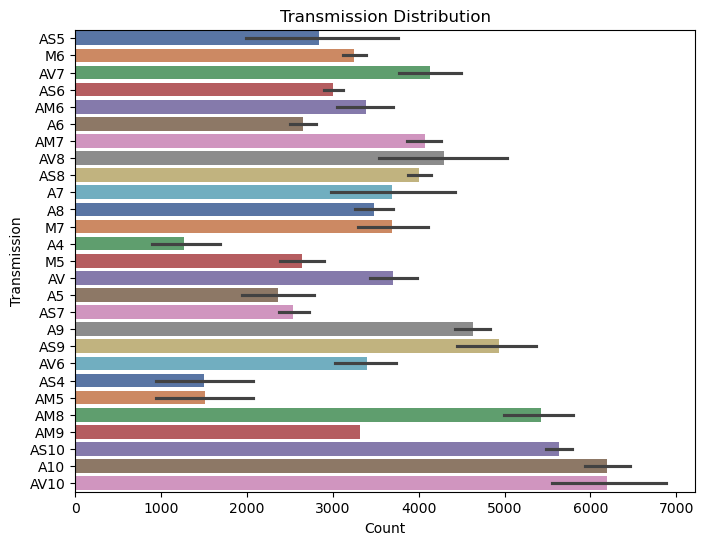

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(df.transmission,palette="deep")
plt.title("Transmission Distribution")
plt.xlabel("Count")
plt.ylabel("Transmission")
plt.show()

In [59]:
df.fuel_type.value_counts()

fuel_type
X    3039
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64

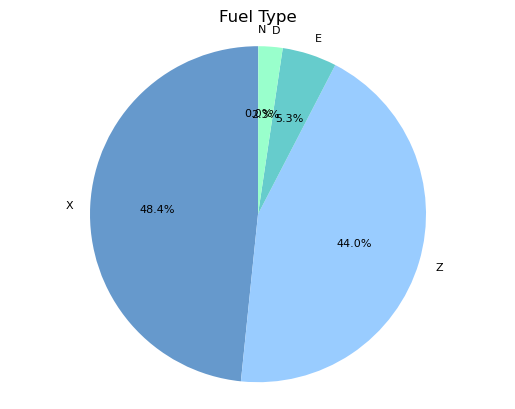

In [60]:
colors = ['#6699CC', '#99CCFF', '#66CCCC', '#99FFCC', '#CCCCFF']
plt.pie(df.fuel_type.value_counts(),labels=df.fuel_type.value_counts().index,autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 8})
plt.title("Fuel Type")  
plt.axis('equal') 
plt.show()

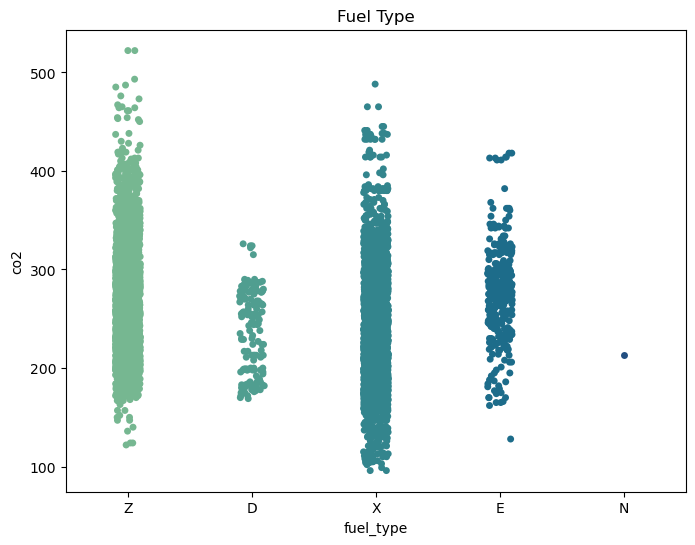

In [61]:
plt.figure(figsize=(8,6))
sns.stripplot(x=df.fuel_type,y=df.co2,palette="crest")
plt.title("Fuel Type")
plt.show()

In [69]:
df.fuel_cons_city.nunique()

211

In [71]:
df.fuel_cons_hwy.nunique()

143

In [73]:
df.fuel_cons_comb.nunique()

181

In [75]:
df.fuel_cons_comb_mpg.nunique()

54

<Figure size 800x600 with 0 Axes>

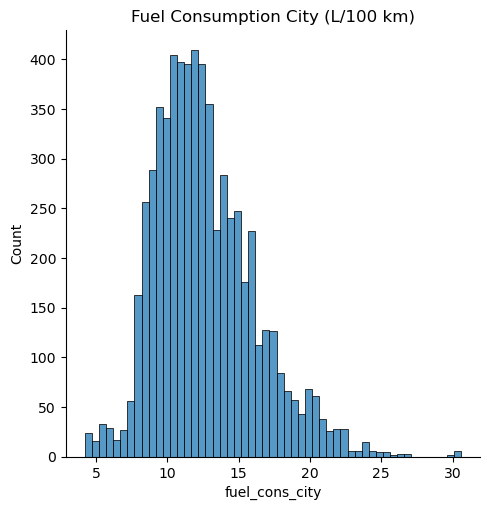

In [77]:
plt.figure(figsize=(8,6))
sns.displot(df.fuel_cons_city)
plt.title('Fuel Consumption City (L/100 km)')
plt.show()

<Figure size 800x600 with 0 Axes>

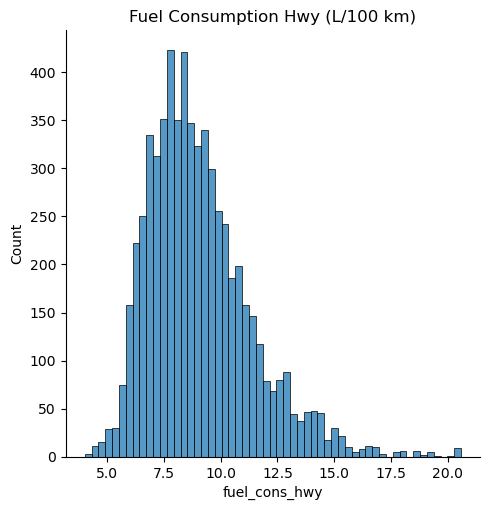

In [79]:
plt.figure(figsize=(8,6))
sns.displot(df.fuel_cons_hwy)
plt.title('Fuel Consumption Hwy (L/100 km)')
plt.show()

<Figure size 800x600 with 0 Axes>

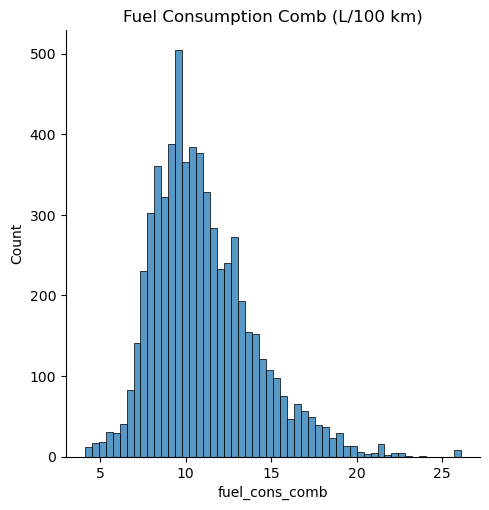

In [81]:
plt.figure(figsize=(8,6))
sns.displot(df.fuel_cons_comb)
plt.title('Fuel Consumption Comb (L/100 km)')
plt.show()

<Figure size 800x600 with 0 Axes>

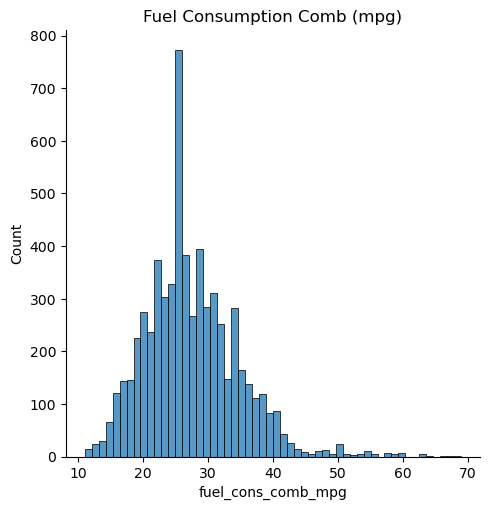

In [83]:
plt.figure(figsize=(8,6))
sns.displot(df.fuel_cons_comb_mpg)
plt.title('Fuel Consumption Comb (mpg)')
plt.show()

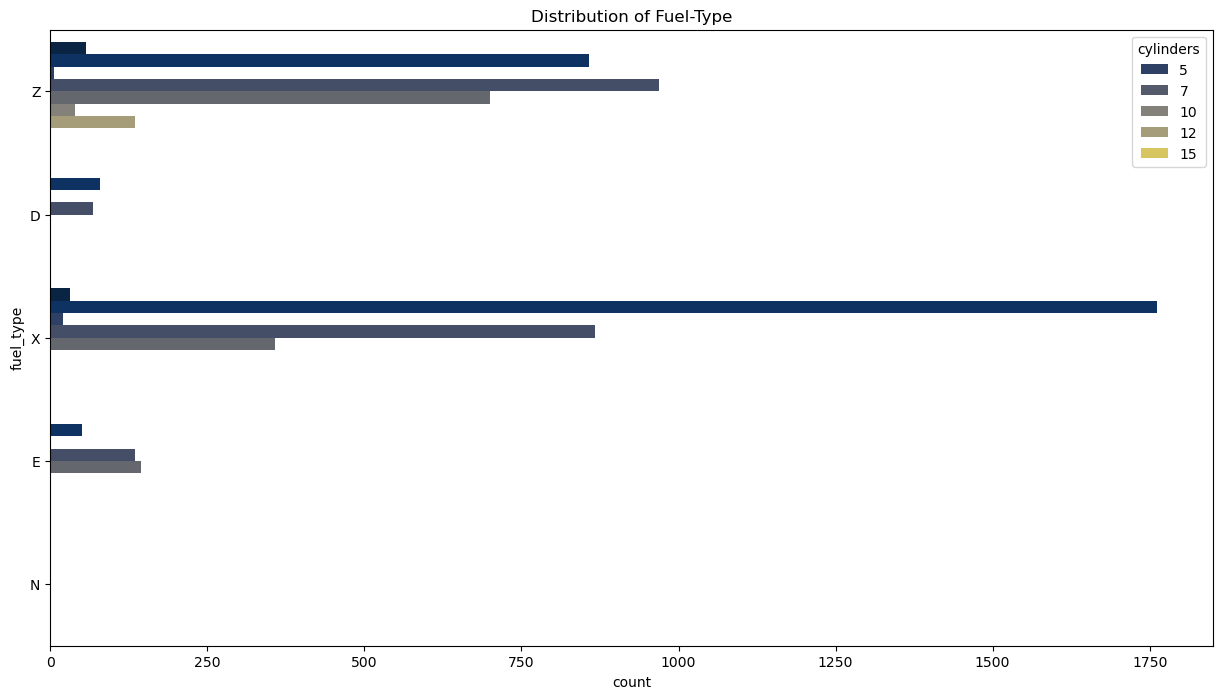

In [85]:
plt.figure(figsize = (15,8))
sns.countplot(y="fuel_type", data=df, hue='cylinders',palette="cividis")
plt.title('Distribution of Fuel-Type');

In [87]:
df[df.co2 == df.co2.min()]

make       model vehicle_class  engine_size  cylinders transmission  \
3824  HYUNDAI  IONIQ BLUE     FULL-SIZE          1.6          4          AM6   
5931  HYUNDAI  IONIQ Blue     FULL-SIZE          1.6          4          AM6   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
3824         X             4.2            4.0             4.1   
5931         X             4.2            4.0             4.1   

      fuel_cons_comb_mpg  co2  
3824                  69   96  
5931                  69   96

In [89]:
df[df.co2 == df.co2.max()]

make   model vehicle_class  engine_size  cylinders transmission  \
4509  BUGATTI  CHIRON    TWO-SEATER          8.0         16          AM7   
5575  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
4509         Z            26.8           16.6            22.2   
5575         Z            26.8           16.6            22.2   

      fuel_cons_comb_mpg  co2  
4509                  13  522  
5575                  13  522

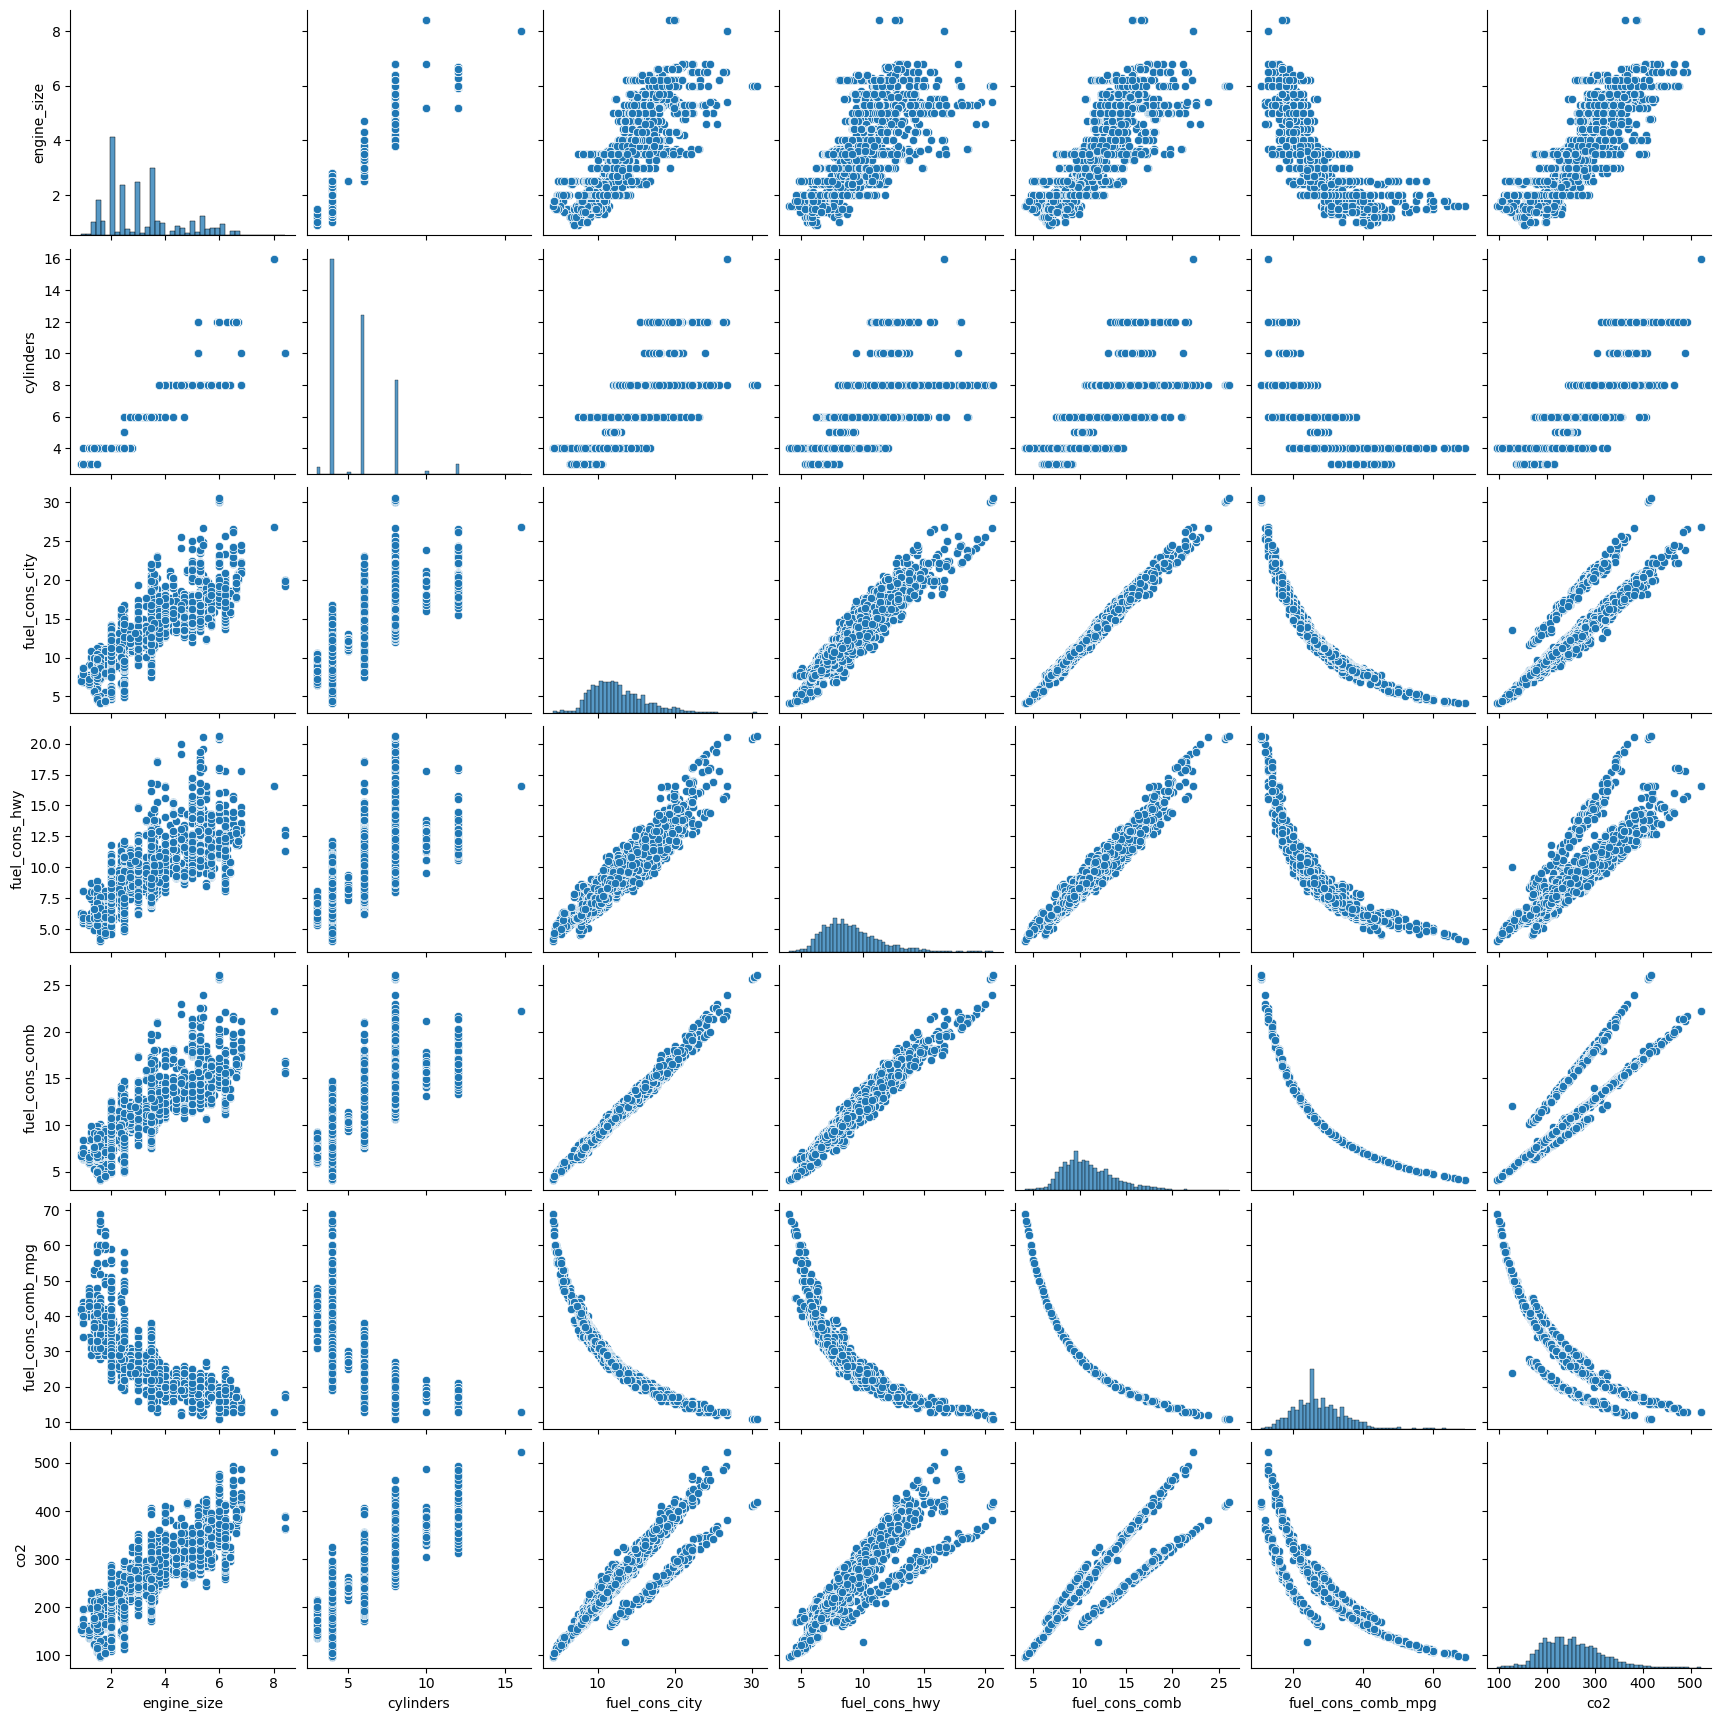

In [91]:
sns.pairplot(df);

# <font color='green'> <b>Simple Linear Regression Model</b><font color='black'>

In [94]:
corr=df.co2.corr(df.fuel_cons_comb)
corr

0.9168403485353197

In [96]:
r2_score=corr**2
r2_score

0.8405962247023665

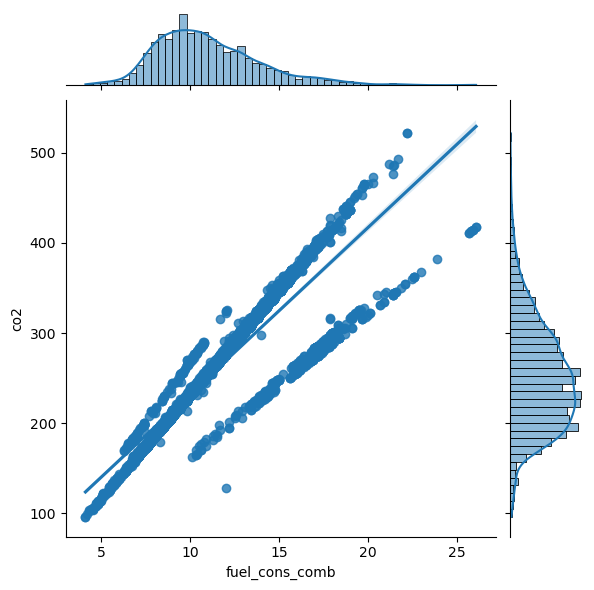

In [98]:
sns.jointplot(y=df.co2,x=df.fuel_cons_comb,kind="reg");

## <font color='blue'> <b>Splitting the dataset into X (independent variables) and y (dependent variable)</b><font color='black'>

In [101]:
X=df[["fuel_cons_comb"]]
y=df["co2"]

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [104]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [108]:
print("X_train : ", X_train.shape)
print("y_train  : ", y_train.shape)
print("X_test  : ", X_test.shape)
print("y_test   : ", y_test.shape)

X_train :  (5025, 1)
y_train  :  (5025,)
X_test  :  (1257, 1)
y_test   :  (1257,)


## <font color='blue'> <b>Training the Model</b><font color='black'>

In [111]:
from sklearn.linear_model import LinearRegression

In [113]:
model=LinearRegression()

In [115]:
model.fit(X_train,y_train)

LinearRegression()

In [117]:
model.coef_

array([18.59025041])

In [119]:
model.intercept_

46.52965071371068

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [122]:
y_train_pred=model.predict(X_train)

In [124]:
y_pred=model.predict(X_test)

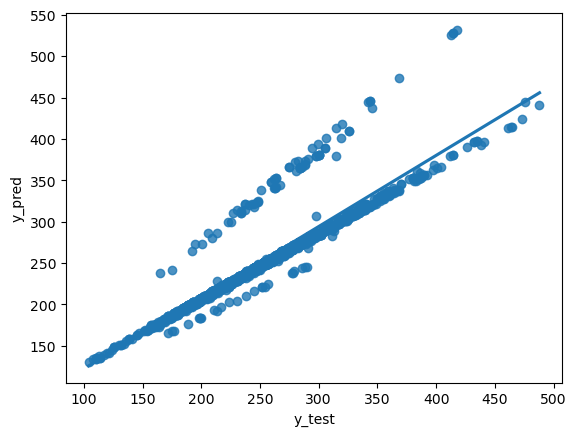

In [126]:
sns.regplot(x=y_test,y=y_pred,ci=None)

plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [128]:
values={"actual" : y_test, "predicted" : y_pred, "residual" : y_test-y_pred , "LSE" : (y_test-y_pred)**2}

df2=pd.DataFrame(values)
df2

actual   predicted   residual         LSE
3295     259  254.740455   4.259545   18.143721
4575     176  185.956529  -9.956529   99.132466
3585     257  249.163380   7.836620   61.412610
7199     174  185.956529 -11.956529  142.958581
2915     186  195.251654  -9.251654   85.593102
...      ...         ...        ...         ...
2151     271  265.894606   5.105394   26.065052
4        244  243.586305   0.413695    0.171143
2233     232  230.573130   1.426870    2.035959
2546     168  180.379454 -12.379454  153.250873
3544     307  290.061931  16.938069  286.898178

[1257 rows x 4 columns]

In [130]:
df2.LSE

3295     18.143721
4575     99.132466
3585     61.412610
7199    142.958581
2915     85.593102
           ...    
2151     26.065052
4         0.171143
2233      2.035959
2546    153.250873
3544    286.898178
Name: LSE, Length: 1257, dtype: float64

In [132]:
df2.LSE.sum()

771160.8136709038

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [135]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [137]:
R2_score=r2_score(y_test,y_pred)
R2_score

0.8268920072738492

In [139]:
mae=mean_absolute_error(y_test,y_pred)
mae

14.766126536759725

In [141]:
mse=mean_squared_error(y_test,y_pred)
mse

613.4930896347684

In [143]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [145]:
model_score=train_val(y_train,y_train_pred,y_test,y_pred,"simple_linear")
model_score

simple_linear_train  simple_linear_test
R2               0.843980            0.826892
mae             14.137593           14.766127
mse            547.230768          613.493090
rmse            23.392964           24.768793

In [147]:
avg_co2=df.co2.mean()
avg_co2

251.1577523081821

In [149]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

24.76879265597676

In [151]:
rmse/avg_co2

0.09861846758998032

## <font color='blue'> <b>Residuals</b><font color='black'>

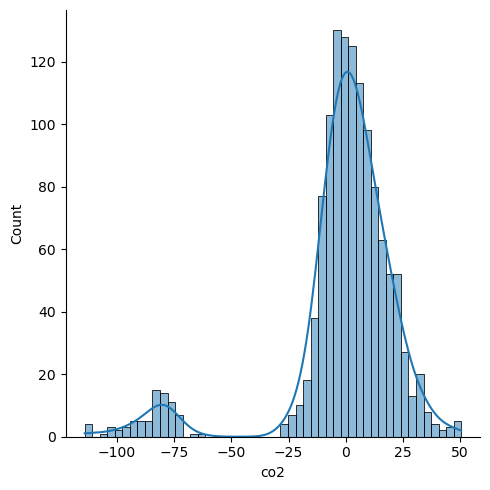

In [154]:
sns.displot((y_test-y_pred),kde=True,bins=50);

## <font color='blue'> <b>Prediction Error for LinearRegression</b><font color='black'>

In [157]:
from yellowbrick.regressor import PredictionError

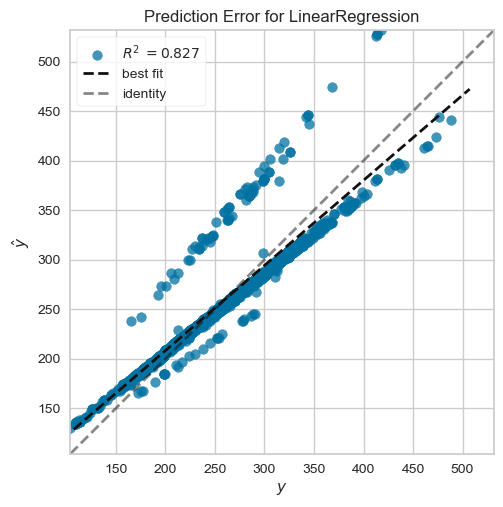

In [158]:
model=LinearRegression()
visualizer=PredictionError(model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show();

# <font color='green'> <b>Multiple Linear Regression Model</b><font color='black'>

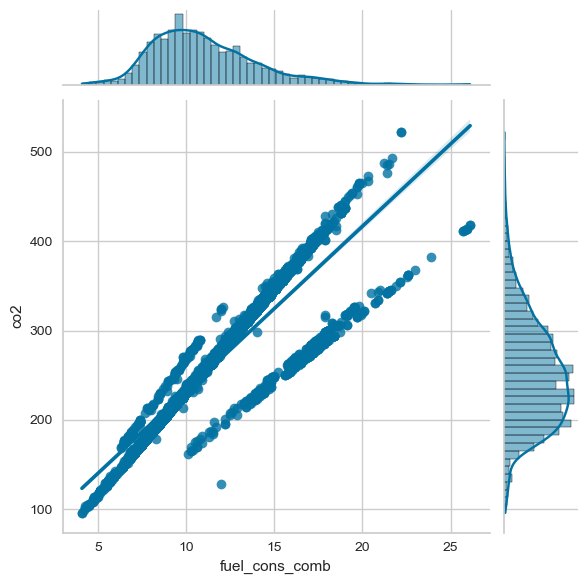

In [162]:
sns.jointplot(y=df.co2,x=df.fuel_cons_comb,kind="reg");

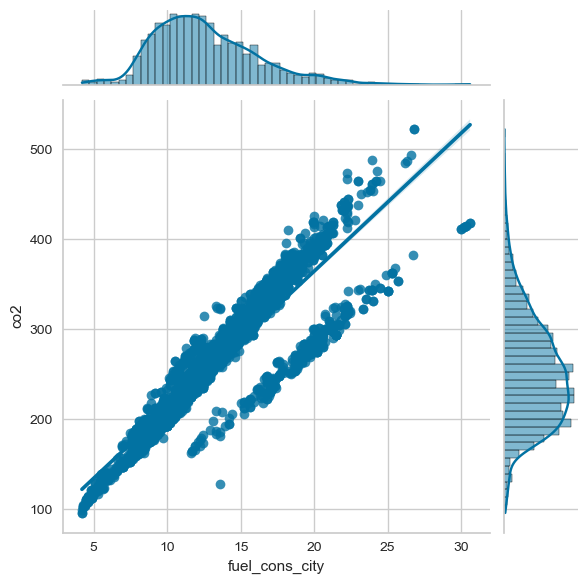

In [163]:
sns.jointplot(y=df.co2,x=df.fuel_cons_city,kind="reg");

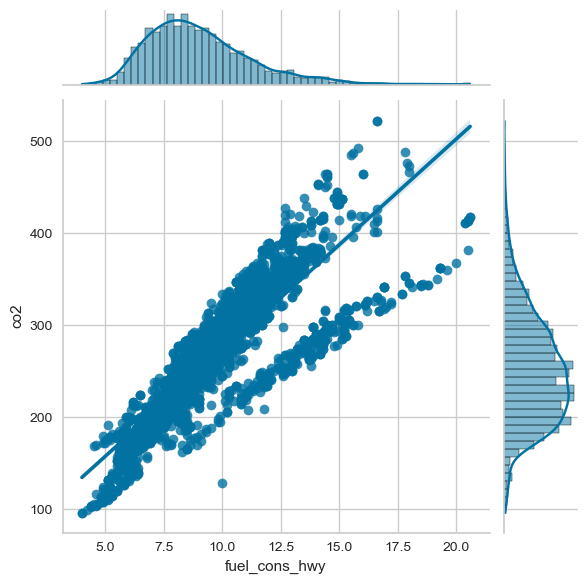

In [164]:
sns.jointplot(y=df.co2,x=df.fuel_cons_hwy,kind="reg");

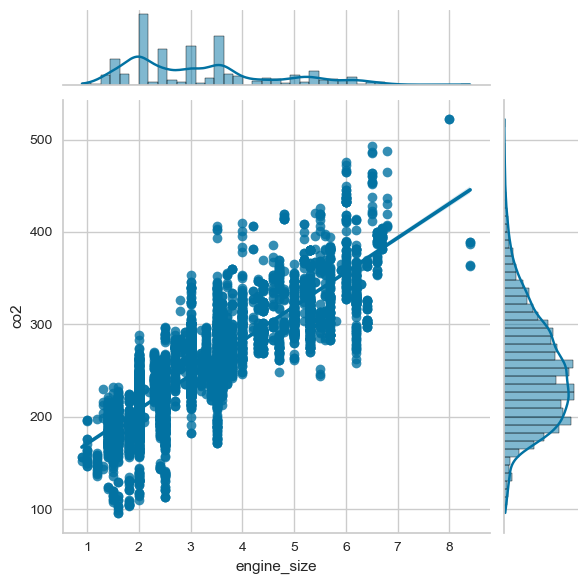

In [166]:
sns.jointplot(y=df.co2,x=df.engine_size,kind="reg");

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [170]:
X=df[["engine_size","fuel_cons_comb","fuel_cons_city","fuel_cons_hwy"]]
y=df["co2"]

In [173]:
df.select_dtypes(["int","float"]).corr()

engine_size  cylinders  fuel_cons_city  fuel_cons_hwy  \
engine_size            1.000000   0.928843        0.834228       0.766817   
cylinders              0.928843   1.000000        0.801277       0.717647   
fuel_cons_city         0.834228   0.801277        1.000000       0.950811   
fuel_cons_hwy          0.766817   0.717647        0.950811       1.000000   
fuel_cons_comb         0.820146   0.781099        0.994052       0.978607   
fuel_cons_comb_mpg    -0.762955  -0.723731       -0.927640      -0.891892   
co2                    0.854802   0.834687        0.918756       0.883424   

                    fuel_cons_comb  fuel_cons_comb_mpg       co2  
engine_size               0.820146           -0.762955  0.854802  
cylinders                 0.781099           -0.723731  0.834687  
fuel_cons_city            0.994052           -0.927640  0.918756  
fuel_cons_hwy             0.978607           -0.891892  0.883424  
fuel_cons_comb            1.000000           -0.925801  0.916840  
fuel_cons_comb_mpg       -0.925801            1.000000 -0.906783  
co2                       0.916840           -0.906783  1.000000

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [178]:
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (4397, 4)
y_train :  (4397,)
X_test :  (1885, 4)
y_test :  (1885,)


## <font color='blue'> <b>Training the Model</b><font color='black'>

In [181]:
ml_model=LinearRegression()

In [183]:
ml_model.fit(X_train,y_train)

LinearRegression()

In [185]:
ml_model.coef_

array([13.1077248 ,  4.29456413,  6.06759291,  2.44724413])

In [187]:
ml_model.intercept_

63.5530827693033

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [190]:
y_train_pred=ml_model.predict(X_train)

In [192]:
y_pred=ml_model.predict(X_test)

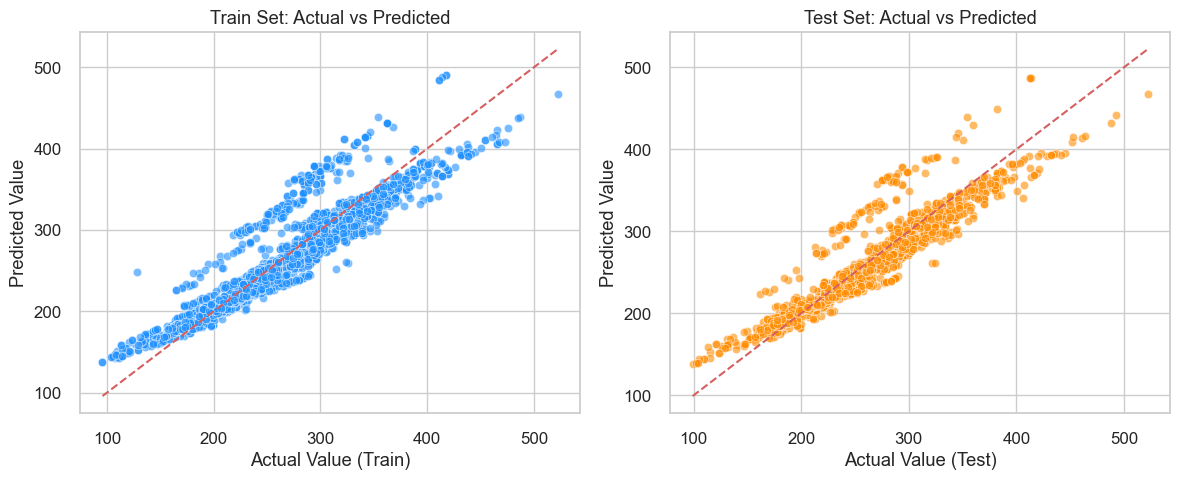

In [194]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color="dodgerblue", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Value (Train)")
plt.ylabel("Predicted Value")
plt.title("Train Set: Actual vs Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, color="darkorange", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Value (Test)")
plt.ylabel("Predicted Value")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [197]:
avg_co2=df.co2.mean()
avg_co2

251.1577523081821

In [199]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

21.4062497126035

In [201]:
rmse/avg_co2

0.08523029656013584

In [203]:
y_pred=ml_model.predict(X_test)
y_train_pred=ml_model.predict(X_train)

In [205]:
ml_model_score=train_val(y_train, y_train_pred, y_test, y_pred, "multilinear")
ml_model_score

multilinear_train  multilinear_test
R2             0.872779          0.873449
mae           13.754897         14.090878
mse          441.061082        458.227527
rmse          21.001454         21.406250

## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [208]:
from sklearn.metrics import get_scorer_names

scorers=get_scorer_names()
scorers

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [210]:
from sklearn.model_selection import cross_validate,cross_val_score

In [212]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [214]:
scores=pd.DataFrame(scores,index=range(1,11))
scores

fit_time  score_time   test_r2  train_r2  test_neg_mean_absolute_error  \
1   0.001064    0.001933  0.884300  0.871133                    -14.220815   
2   0.002450    0.003035  0.861414  0.873937                    -14.072846   
3   0.001663    0.000000  0.840529  0.876427                    -15.594608   
4   0.002000    0.002000  0.876127  0.872389                    -13.777247   
5   0.001999    0.001999  0.864990  0.873606                    -14.170507   
6   0.000000    0.000000  0.878731  0.872133                    -12.835998   
7   0.000000    0.000000  0.878958  0.872099                    -12.696786   
8   0.000000    0.000000  0.874424  0.872564                    -13.932344   
9   0.002017    0.001981  0.872055  0.872811                    -13.689335   
10  0.002135    0.002004  0.889482  0.870854                    -12.720620   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                      -13.746240                  -464.312731   
2                      -13.706138                  -472.947773   
3                      -13.378059                  -589.472192   
4                      -13.728626                  -427.909567   
5                      -13.745752                  -452.978447   
6                      -13.847057                  -386.603938   
7                      -13.831758                  -387.150114   
8                      -13.739574                  -438.368616   
9                      -13.903378                  -435.057084   
10                     -13.908159                  -369.072770   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                    -438.497715                        -21.547917   
2                    -437.613658                        -21.747362   
3                    -424.811405                        -24.279048   
4                    -442.532727                        -20.685975   
5                    -439.754224                        -21.283290   
6                    -447.122361                        -19.662247   
7                    -447.149686                        -19.676131   
8                    -441.440229                        -20.937254   
9                    -441.885446                        -20.858022   
10                   -449.093846                        -19.211267   

    train_neg_root_mean_squared_error  
1                          -20.940337  
2                          -20.919217  
3                          -20.610954  
4                          -21.036462  
5                          -20.970318  
6                          -21.145268  
7                          -21.145914  
8                          -21.010479  
9                          -21.021071  
10                         -21.191834

In [216]:
scores.iloc[: , 2: ].mean()

test_r2                                0.872101
train_r2                               0.872795
test_neg_mean_absolute_error         -13.771110
train_neg_mean_absolute_error        -13.753474
test_neg_mean_squared_error         -442.387323
train_neg_mean_squared_error        -440.990130
test_neg_root_mean_squared_error     -20.988851
train_neg_root_mean_squared_error    -20.999185
dtype: float64

In [218]:
pd.concat([model_score,ml_model_score],axis=1)

simple_linear_train  simple_linear_test  multilinear_train  \
R2               0.843980            0.826892           0.872779   
mae             14.137593           14.766127          13.754897   
mse            547.230768          613.493090         441.061082   
rmse            23.392964           24.768793          21.001454   

      multilinear_test  
R2            0.873449  
mae          14.090878  
mse         458.227527  
rmse         21.406250

In [220]:
print("train RMSE:", 20.762905/df["co2"].mean())
print("CV RMSE:", 20.929894/df["co2"].mean())

train RMSE: 0.0826687801160243
CV RMSE: 0.0833336570647362


In [222]:
mlr_df=pd.DataFrame(ml_model.coef_,index=X_train.columns ,columns=["ml_model_coef"])
mlr_df

ml_model_coef
engine_size         13.107725
fuel_cons_comb       4.294564
fuel_cons_city       6.067593
fuel_cons_hwy        2.447244

## <font color='blue'> <b>Residuals</b><font color='black'>

In [225]:
residuals=y_test-y_pred

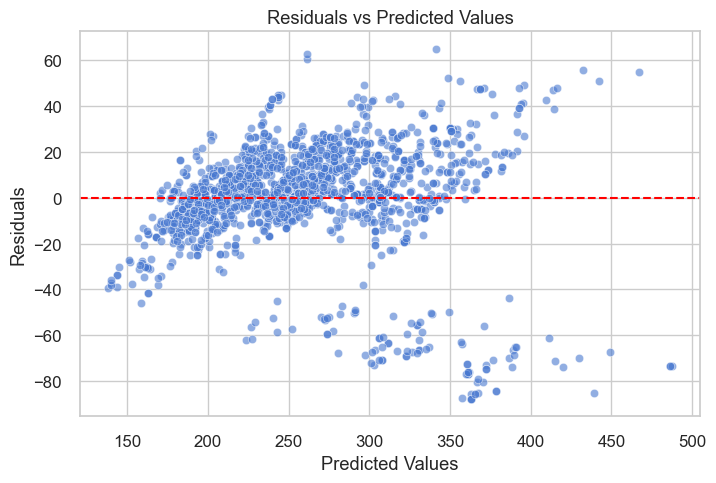

In [227]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


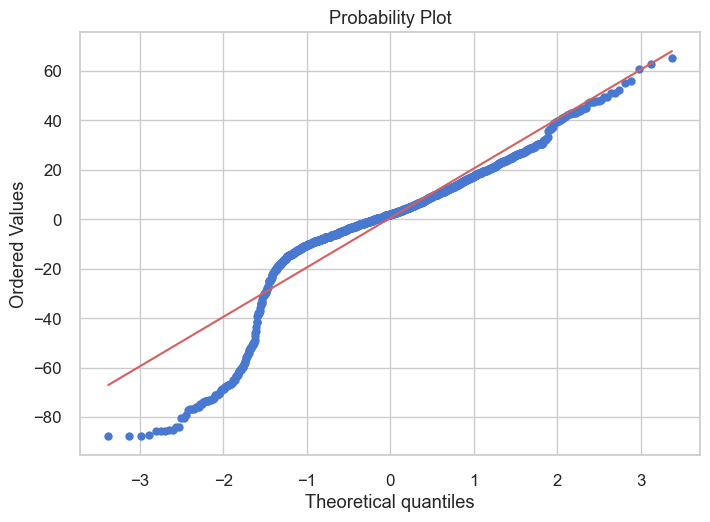

In [229]:
import scipy.stats as stats

stats.probplot(residuals,dist="norm",plot=plt);

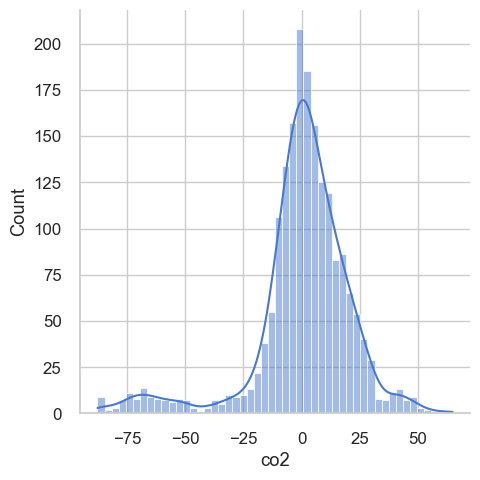

In [231]:
sns.displot((y_test-y_pred), bins=50, kde=True);

## <font color='blue'> <b>Prediction Error for LinearRegression</b><font color='black'>

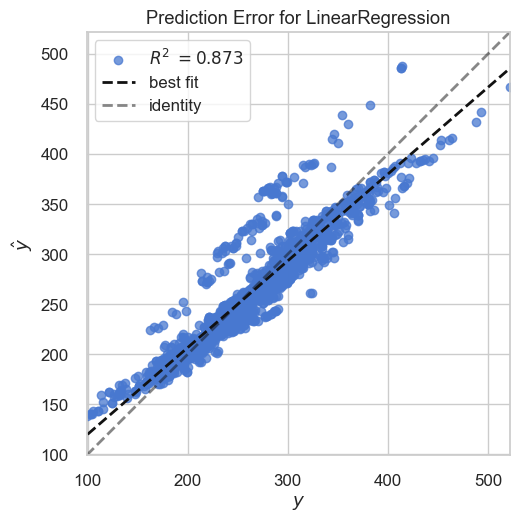

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [234]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show()

# <font color='green'> <b>Final Model and Prediction</b><font color='black'>

In [237]:
final_model=LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [239]:
final_model.coef_

array([13.31909559,  8.94261906,  3.17972248,  0.83563855])

In [241]:
final_model.intercept_

62.83988274736012

In [243]:
X.loc[[5911,1178]]

engine_size  fuel_cons_comb  fuel_cons_city  fuel_cons_hwy
5911          1.5             4.9             4.6            5.3
1178          2.0             9.0            10.7            6.9

In [245]:
new_data=[[1.5,4.9,4.6,5.3],[2.0,9.0,10.7,6.9]]

In [247]:
final_model.predict(new_data)

array([145.69296725, 209.75058199])

In [249]:
df.loc[[5911,1178]]

make       model vehicle_class  engine_size  cylinders transmission  \
5911  HONDA  Insight EX      MID-SIZE          1.5          4           AV   
1178    BMW  428i COUPE       COMPACT          2.0          4           M6   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
5911         X             4.6            5.3             4.9   
1178         Z            10.7            6.9             9.0   

      fuel_cons_comb_mpg  co2  
5911                  58  114  
1178                  31  207

In [251]:
114-145.69296725

-31.69296725000001

In [253]:
207-209.75058199

-2.7505819900000006

In [255]:
y_pred_final=final_model.predict(X)
y_pred_final

array([202.56836677, 222.70216374, 159.50501706, ..., 225.97629479,
       220.55869436, 231.22676751])

In [257]:
my_dict = {"Actual": y, "pred": y_pred_final, "residual": y - y_pred_final}
compare = pd.DataFrame(my_dict)
compare.head(10)

Actual        pred   residual
0     196  202.568367  -6.568367
1     221  222.702164  -1.702164
2     136  159.505017 -23.505017
3     255  256.706575  -1.706575
4     244  249.993177  -5.993177
5     230  243.156022 -13.156022
6     232  244.066567 -12.066567
7     255  259.604803  -4.604803
8     267  266.401765   0.598235
9     212  217.050155  -5.050155

In [259]:
def eval_metric(Actual, pred):
    mae = mean_absolute_error(Actual, pred)
    mse = mean_squared_error(Actual, pred)
    rmse = np.sqrt(mean_squared_error(Actual, pred))
    R2_score = r2_score(Actual, pred)
    #print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [261]:
print("Model testing performance: ")
eval_metric(compare.Actual, compare.pred)

Model testing performance: 
--------------------------
R2_score 	: 0.8731018458994231
MAE 		: 13.804358297494682
MSE 		: 446.0210071868149
RMSE 		: 21.119209435649218


In [263]:
avg_co2 = df['co2'].mean()
avg_co2 

251.1577523081821

In [265]:
rmse = np.sqrt(mean_squared_error(y, y_pred_final))
rmse

21.119209435649218

In [267]:
rmse / avg_co2 

0.08408742808677065

In [269]:
engine_size = 4.0
fuel_cons_city = 7.2
fuel_cons_hwy = 2.5
fuel_cons_comb = 9.7

In [271]:
X = np.array([[engine_size, fuel_cons_city, fuel_cons_hwy, fuel_cons_comb]])

CO2 = final_model.predict(X)

CO2 = np.squeeze(CO2).round(1)

oran = rmse / avg_co2  
dogruluk_orani = ((1 - oran) * 100).round(1)

print(f"Bu aracın CO2 salınımı % {dogruluk_orani} doğrulukla yaklaşık {CO2} g/Km olacaktır.")


Bu aracın CO2 salınımı % 91.6 doğrulukla yaklaşık 196.6 g/Km olacaktır.
